<a href="https://colab.research.google.com/github/Atharva-D/Detection-and-Prediction-of-Diabetes/blob/main/FINAL_RANDOMFOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Random Forest**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
install.packages("data.table") 
install.packages("dplyr") 
install.packages("ggplot2") 
install.packages("caret") 
install.packages("e1071") 
install.packages("cowplot") 
install.packages("matrix")
install.packages("magrittr")
install.packages("glmnet", dependencies=TRUE)
install.packages("groupdata2")
install.packages("class")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5301817 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [21]:
%%R
install.packages("randomForest")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/randomForest_4.6-14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 80074 bytes (78 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

In [7]:
%%R
library(data.table) 
library(dplyr)      
library(ggplot2)  
library(caret)        
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
library(glmnet)
library(groupdata2)
library(class)

R[write to console]: Loaded glmnet 4.1-3



In [23]:
%%R
library(randomForest)

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine




In [8]:
%%R
data = read.csv('/content/gdrive/MyDrive/DS_CP/diabetes.csv')

In [9]:
%%R
colnames(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


In [10]:
%%R
dim(data)

[1] 768   9


In [11]:
%%R
sapply(data, function(x) sum(is.na(x)))

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [12]:
%%R
table(data$Outcome)


  0   1 
500 268 


In [13]:
%%R
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [14]:
%%R
str(data)


'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [15]:
%%R
data<-upsample(
  data,
  cat_col= "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [16]:
%%R
table(data$Outcome)


  0   1 
500 500 


In [17]:
%%R
data$Outcome <- as.factor(data$Outcome)
table(data$Outcome)


  0   1 
500 500 


In [18]:
%%R
set.seed(222)
ind <- sample(2, nrow(data), replace = TRUE,prob = c(0.8,0.2))
train <- data[ind==1,]
test <- data[ind==2,]

In [97]:
%%R
set.seed(122)
rf <- randomForest(Outcome~., data = train,
                   ntree = 550, 
                   mtry = 8,
                   importance = TRUE,
                   proximity = TRUE)

In [98]:
%%R
rf


Call:
 randomForest(formula = Outcome ~ ., data = train, ntree = 550,      mtry = 8, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 550
No. of variables tried at each split: 8

        OOB estimate of  error rate: 14.81%
Confusion matrix:
    0   1 class.error
0 329  84  0.20338983
1  37 367  0.09158416


In [99]:
%%R
install.packages("ggplot2")
library(ggplot2)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3063309 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

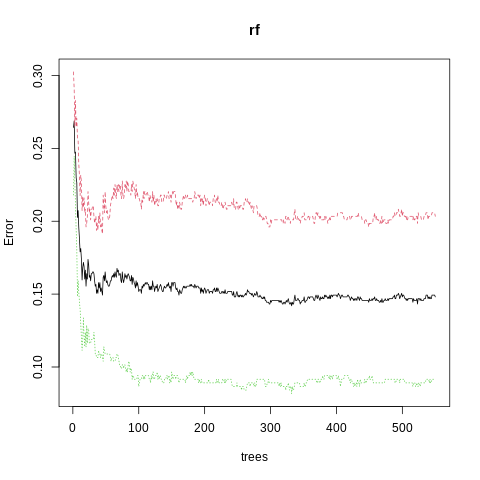

In [100]:
%%R
plot(rf)

In [101]:
%%R
p1 <- predict(rf,train)
confusionMatrix(p1, train$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 413   0
         1   0 404
                                     
               Accuracy : 1          
                 95% CI : (0.9955, 1)
    No Information Rate : 0.5055     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5055     
         Detection Rate : 0.5055     
   Detection Prevalence : 0.5055     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


In [102]:
%%R
p2 <- predict(rf,test)
confusionMatrix(p2,test$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 73  3
         1 14 93
                                          
               Accuracy : 0.9071          
                 95% CI : (0.8554, 0.9449)
    No Information Rate : 0.5246          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8126          
                                          
 Mcnemar's Test P-Value : 0.01529         
                                          
            Sensitivity : 0.8391          
            Specificity : 0.9688          
         Pos Pred Value : 0.9605          
         Neg Pred Value : 0.8692          
             Prevalence : 0.4754          
         Detection Rate : 0.3989          
   Detection Prevalence : 0.4153          
      Balanced Accuracy : 0.9039          
                                          
       'Positive' Class : 0               
                                    

mtry = 2  OOB error = 15.18% 
Searching left ...
mtry = 1 	OOB error = 16.16% 
-0.06451613 3 
Searching right ...
mtry = 8 	OOB error = 14.57% 
0.04032258 3 


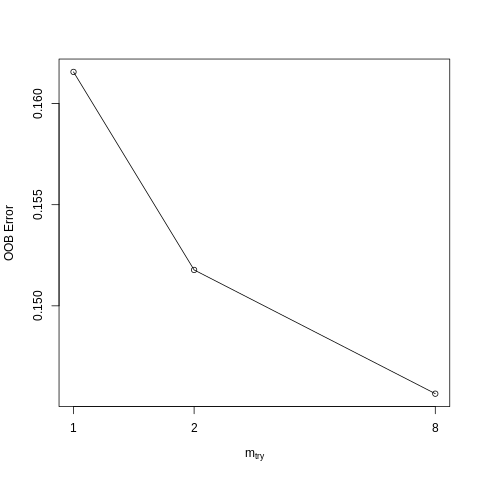

In [96]:
%%R
t <- tuneRF(train[,-9], train[,9],
            stepFactor = 4,
            plot = TRUE,
            ntreeTry = 550,
            trace = TRUE,
            improve = 3)

#**Using another library**

In [47]:
%%R
install.packages("mlbench")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/mlbench_2.1-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 922103 bytes (900 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [48]:
%%R
library(mlbench)

In [49]:
%%R
data(PimaIndiansDiabetes)

In [50]:
%%R
df=PimaIndiansDiabetes

In [54]:
%%R
set.seed(123)
partition <- caret::createDataPartition(y = df$diabetes, times = 1, p = 0.7, list = FALSE)

# create training data set
train_set <- df[partition,]
# create testing data set, subtracting the rows partition to get remaining 30% of the data
test_set <- df[-partition,]

**Upsampling**

In [55]:
%%R
train_set<-upsample(
  train_set,
  cat_col= "diabetes",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [79]:
%%R
model_forest <- caret::train(diabetes ~., data = train_set,
                             method = "ranger",
                             metric = "ROC",
                             trControl = trainControl(method = "cv", number = 100,
                                                      classProbs = T),
                             preProcess = c("center","scale","pca"))

In [80]:
%%R
model_forest

Random Forest 

700 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (100 fold) 
Summary of sample sizes: 694, 692, 692, 693, 692, 692, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.8458929  0.6880797
  2     extratrees  0.8582738  0.7139644
  4     gini        0.8483929  0.6937719
  4     extratrees  0.8436310  0.6843485
  7     gini        0.8469048  0.6910636
  7     extratrees  0.8430357  0.6826950

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = extratrees
 and min.node.size = 1.


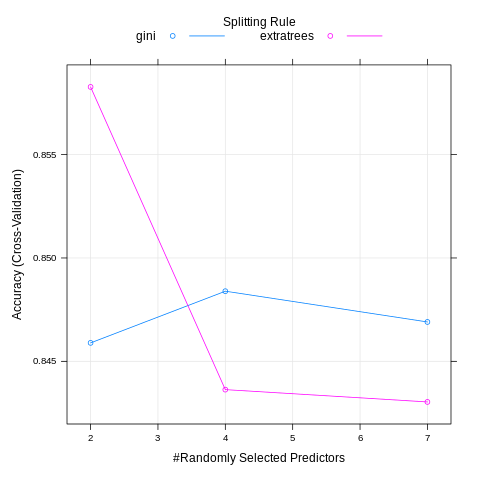

In [81]:
%%R
plot(model_forest)

In [88]:
%%R
pred_rf <- predict(model_forest, test_set)

In [89]:
%%R
cm_rf <- confusionMatrix(pred_rf, test_set$diabetes, positive="pos")

In [90]:
%%R
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 123  30
       pos  27  50
                                          
               Accuracy : 0.7522          
                 95% CI : (0.6912, 0.8066)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.0007075       
                                          
                  Kappa : 0.4489          
                                          
 Mcnemar's Test P-Value : 0.7910815       
                                          
            Sensitivity : 0.6250          
            Specificity : 0.8200          
         Pos Pred Value : 0.6494          
         Neg Pred Value : 0.8039          
             Prevalence : 0.3478          
         Detection Rate : 0.2174          
   Detection Prevalence : 0.3348          
      Balanced Accuracy : 0.7225          
                                          
       'Positive' Class : pos             
                              

In [65]:
%%R
pred_prob_rf <- predict(model_forest, test_set, type="prob")

In [71]:

%%R
install.packages("pROC")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pROC_1.18.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 688430 bytes (672 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [72]:
%%R
library(pROC)

R[write to console]: Type 'citation("pROC")' for a citation.

R[write to console]: 
Attaching package: ‘pROC’


R[write to console]: The following objects are masked from ‘package:stats’:

    cov, smooth, var


